# Salaries for San Fransisco Employees #

In [4]:
# Librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive

# Mount google Drive
drive.mount('/content/drive')

# Google drive file path
file_path = "/content/drive/MyDrive/My Files/Total.csv"

df = pd.read_csv(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18         0.0  400184.25  Not Provided  567595.43   
1  155966.02   245131.88  137811.38  Not Provided  538909.28   
2  212739.13   106088.18    16452.6  Not Provided  335279.91   
3    77916.0    56120.71   198306.9  Not Provided  332343.61   
4   134401.6      9737.0  182234.59  Not Provided  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011

/tmp/ipython-input-2768398684.py:9: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Exploratory Data Analysis ##

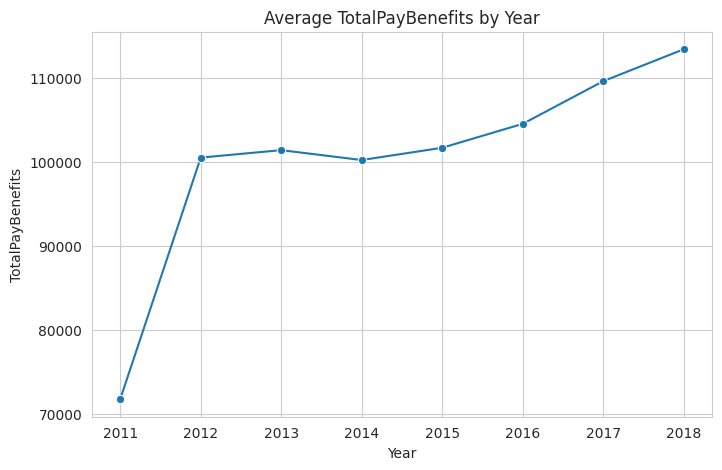

In [6]:

sns.set_style("whitegrid")
%matplotlib inline

pay_by_year = df.groupby('Year')['TotalPayBenefits'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=pay_by_year, x='Year', y='TotalPayBenefits', marker='o')
plt.title("Average TotalPayBenefits by Year")
plt.show()

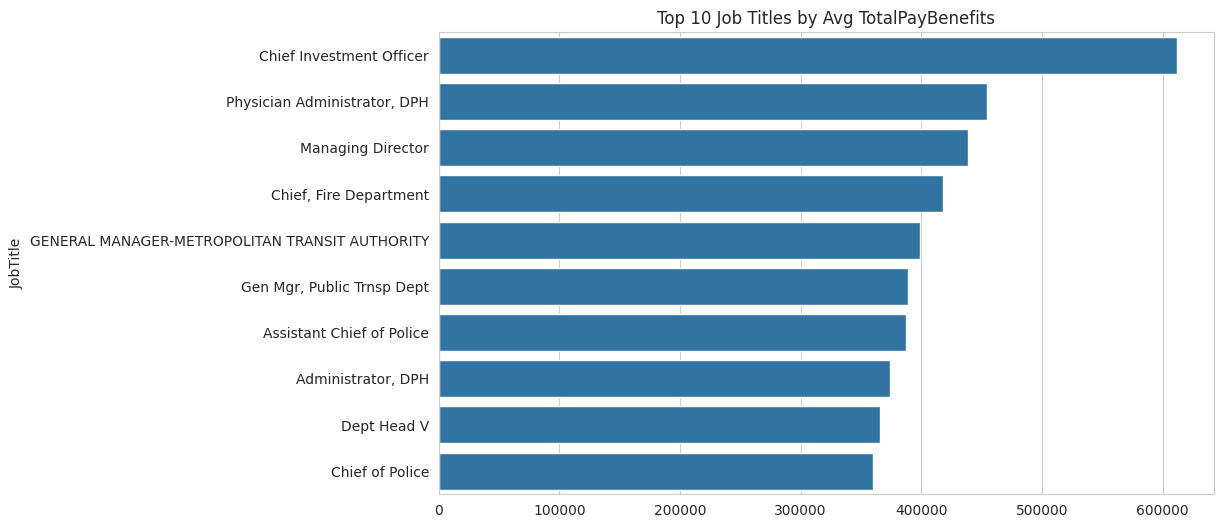

In [7]:
top10_jobs = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_jobs.values, y=top10_jobs.index)
plt.title("Top 10 Job Titles by Avg TotalPayBenefits")
plt.show()

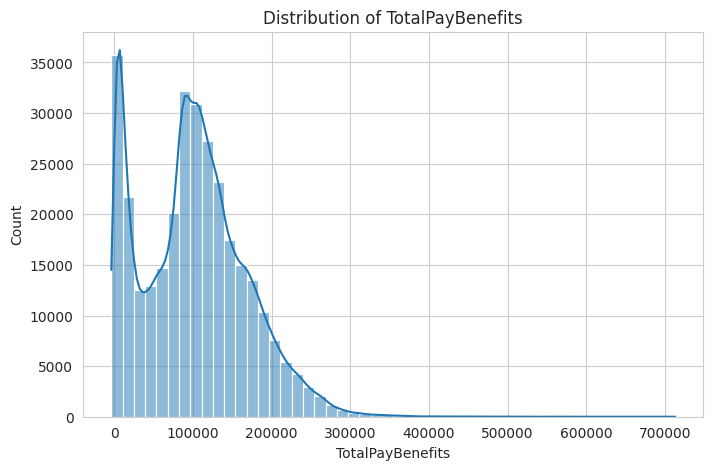

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPayBenefits'], bins=50, kde=True)
plt.title("Distribution of TotalPayBenefits")
plt.show()

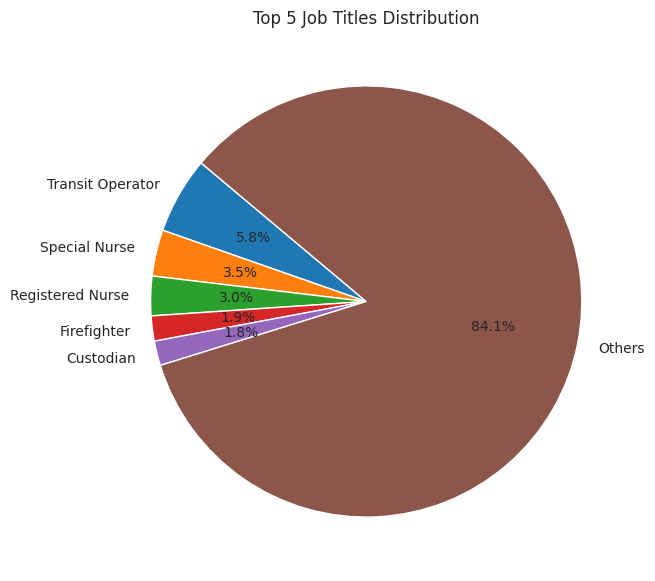

In [10]:
top5 = df['JobTitle'].value_counts().nlargest(5)
others = df.shape[0] - top5.sum()

labels = list(top5.index) + ["Others"]
sizes = list(top5.values) + [others]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Job Titles Distribution")
plt.show()


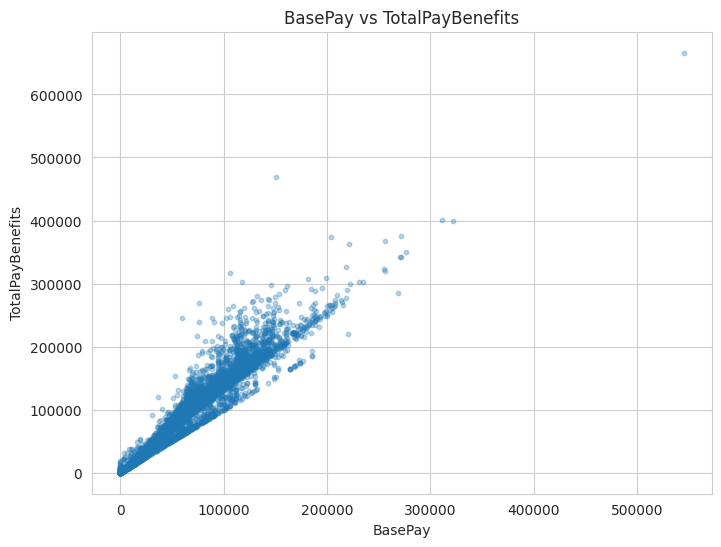

In [15]:
import matplotlib.pyplot as plt

# Force numeric conversion for the scatter plot
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'], errors='coerce')

# Drop rows with missing values in these two columns
sample = df[['BasePay','TotalPayBenefits']].dropna()

# Take a random sample if the dataset is huge
sample = sample.sample(n=min(5000, len(sample)), random_state=42)

# Plot scatter
plt.figure(figsize=(8,6))
plt.scatter(sample['BasePay'], sample['TotalPayBenefits'], alpha=0.3, s=10)
plt.xlabel("BasePay")
plt.ylabel("TotalPayBenefits")
plt.title("BasePay vs TotalPayBenefits")
plt.show()

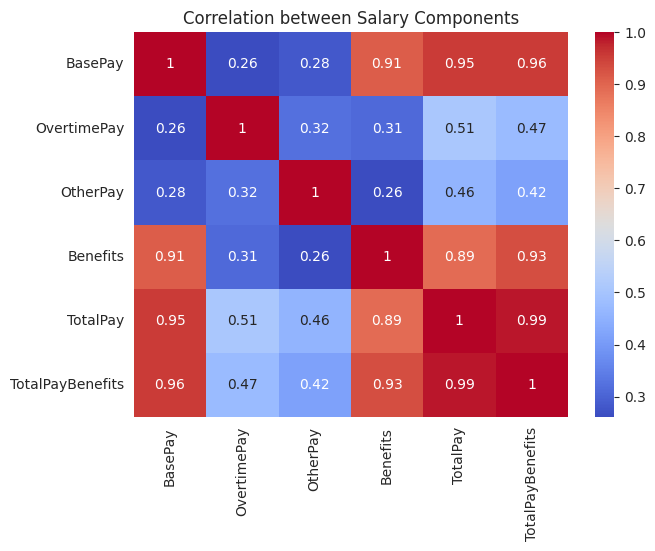

In [16]:
# Ensure numeric conversion
num_cols = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Now correlation will work
corr = df[num_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Salary Components")
plt.show()
